In [29]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [2]:
file = '../Training_Batch_Files/adultCensus_20230602_010222.csv'

In [3]:
df = pd.read_csv(file)

In [132]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [133]:
df.shape

(32561, 15)

In [134]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

In [135]:
df.dtypes.index

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [136]:
df.dtypes.values

array([dtype('int64'), dtype('O'), dtype('int64'), dtype('O'),
       dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('O'), dtype('O')], dtype=object)

In [137]:
dict(zip(df.dtypes.index,df.dtypes.values))

{'age': dtype('int64'),
 'workclass': dtype('O'),
 'fnlwgt': dtype('int64'),
 'education': dtype('O'),
 'education-num': dtype('int64'),
 'marital-status': dtype('O'),
 'occupation': dtype('O'),
 'relationship': dtype('O'),
 'race': dtype('O'),
 'sex': dtype('O'),
 'capital-gain': dtype('int64'),
 'capital-loss': dtype('int64'),
 'hours-per-week': dtype('int64'),
 'country': dtype('O'),
 'salary': dtype('O')}

In [138]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [139]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [140]:
numerical = df.select_dtypes(include=['int64'])
categorical = df.select_dtypes(include=['O'])

In [141]:
print(numerical.shape,categorical.shape)

(32561, 6) (32561, 9)


In [142]:
for i in categorical.columns:
    print(i, df[i].nunique(),'\n', df[i].unique(),'\n')

workclass 9 
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

education 16 
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

marital-status 7 
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 

occupation 15 
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv'] 

relationship 6 
 [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 

race 5 
 [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other'] 

sex 2 
 [' Male' ' Female'] 

country 42 
 [' Un

In [143]:
for i in categorical.columns:
    print(i,df[i].nunique(),'\n', df[i].value_counts(),'\n')

workclass 9 
  Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64 

education 16 
  HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64 

marital-status 7 
  Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64 

occupation 15 
 

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
# # checking the distribution of numerical features
# plt.figure(figsize=(20,25), facecolor='white')
# plotnumber = 1
# for column in numerical:
#      if plotnumber<=6:
#             ax = plt.subplot(3,2,plotnumber)
#             sns.displot(df[column])
#             plt.xlabel(column,fontsize=20)
#             plotnumber+=1
# plt.tight_layout()         

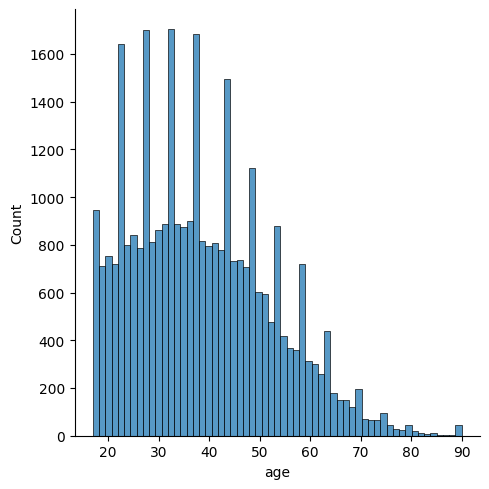

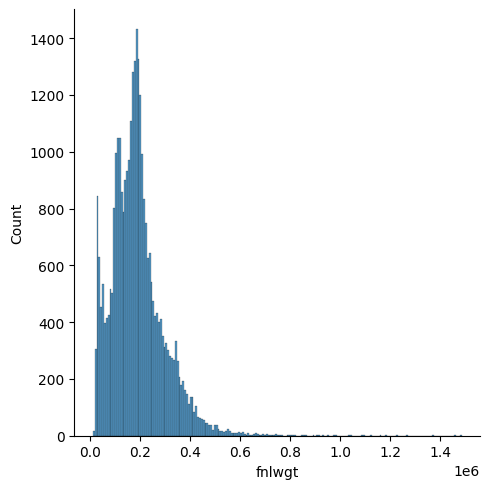

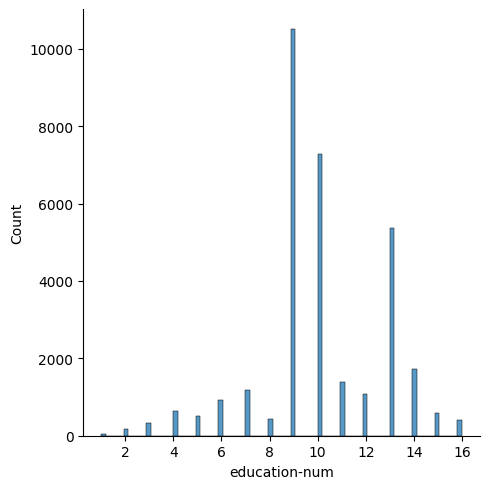

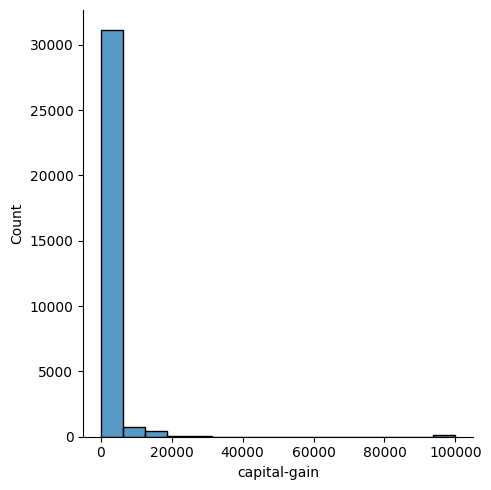

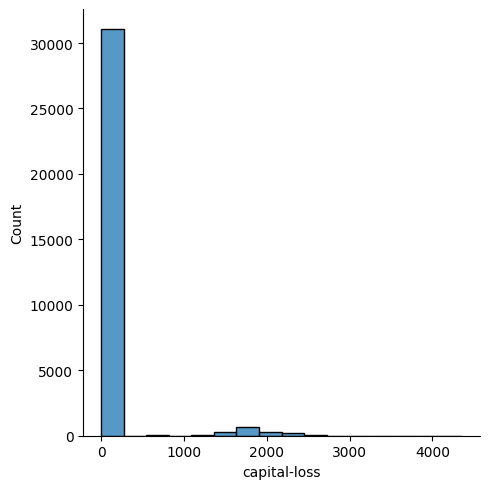

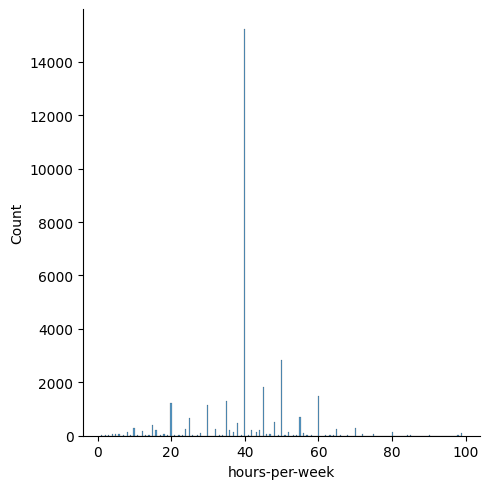

In [146]:
for col in numerical:
    print(sns.displot(df[col]))

In [147]:
q = df['age'].quantile(0.98)
df_cleaned = df[df['age']<q]

q = df_cleaned['fnlwgt'].quantile(0.90)
df_cleaned = df_cleaned[df_cleaned['fnlwgt']<q]

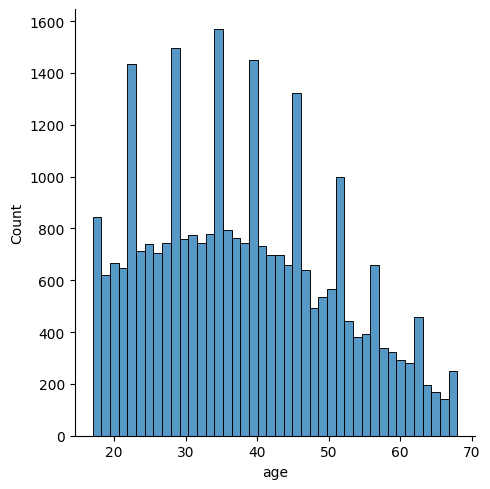

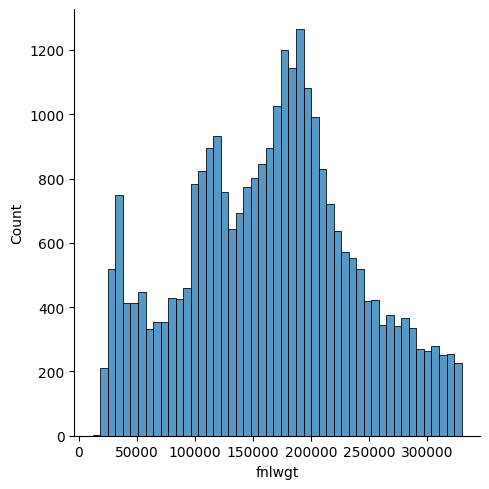

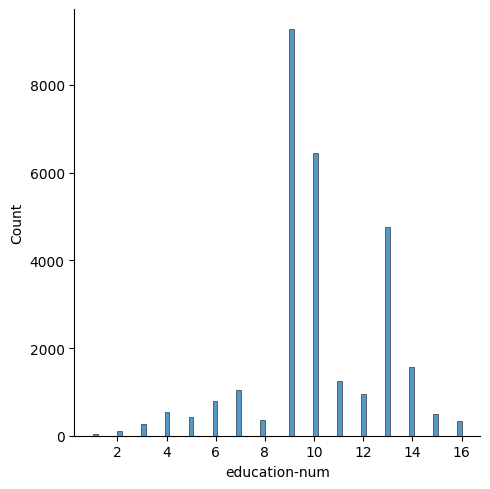

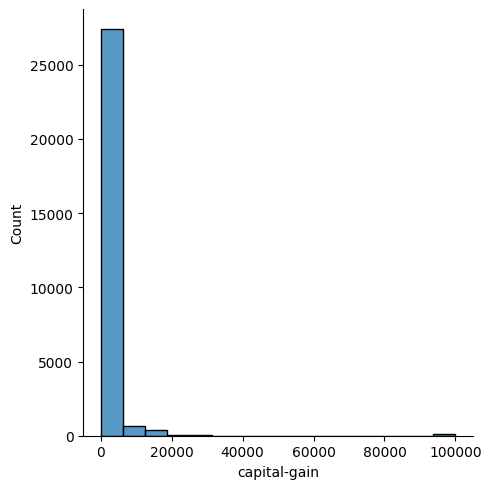

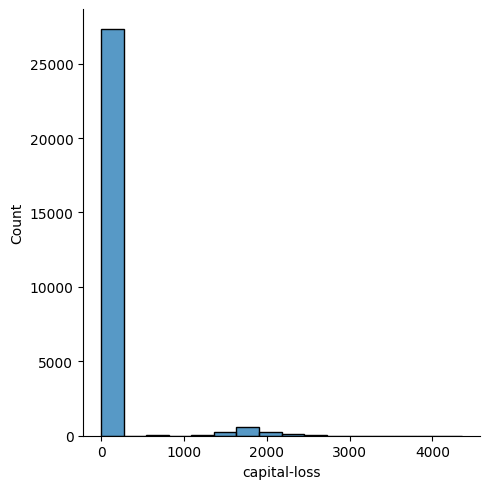

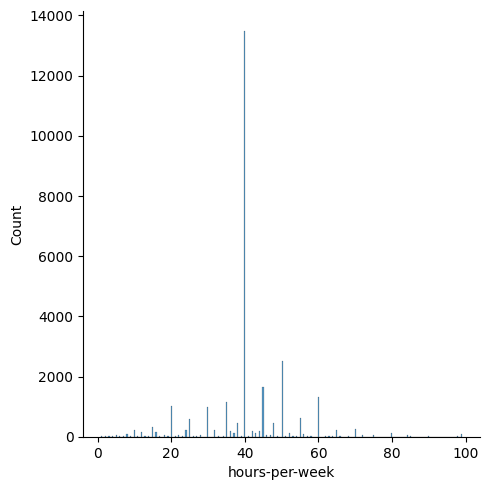

In [148]:
for col in numerical:
    print(sns.displot(df_cleaned[col]))

In [149]:
print(df.shape, df_cleaned.shape)

(32561, 15) (28640, 15)


In [150]:
# from sklearn.preprocessing import StandardScaler
# scalar = StandardScaler()
# numerical_scaled = scalar.fit_transform(df_cleaned)

<AxesSubplot:>

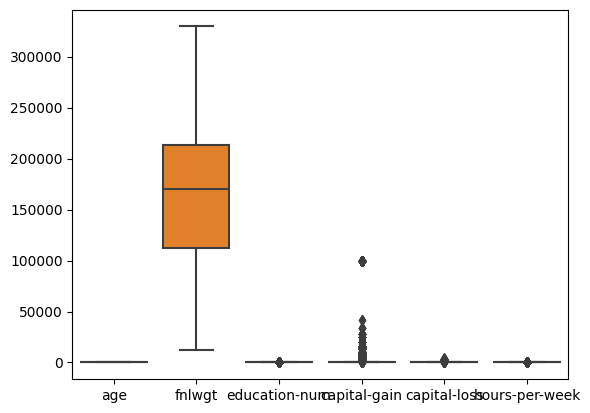

In [151]:
sns.boxplot(df_cleaned)

In [153]:
df_cleaned.salary.value_counts()

 <=50K    21708
 >50K      6932
Name: salary, dtype: int64

In [154]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [155]:
df_cleaned['sal_trans'] = le.fit_transform(df_cleaned['salary'])

In [156]:
df_cleaned['sal_trans'].value_counts()

0    21708
1     6932
Name: sal_trans, dtype: int64

In [157]:
df_cleaned.drop(columns=['salary'], inplace=True)

In [158]:
round(df_cleaned.shape[0]/2)

14320

In [159]:
class_0 = df_cleaned[df_cleaned['sal_trans']==0]
class_1 = df_cleaned[df_cleaned['sal_trans']==1]

In [160]:
print(len(class_0), len(class_1))

21708 6932


In [161]:
class_1_upsampled = resample(class_1,
                          replace=True, # sample with replacement
                          n_samples=round(df_cleaned.shape[0]/2), # create half of the dataset
                          random_state=27) # reproducible results

In [162]:
class_0_downsampled = resample(class_0,
                          replace=True, # sample with replacement
                          n_samples=round(df_cleaned.shape[0]/2), # create half of the dataset
                          random_state=27) # reproducible results

In [163]:
data_balanced = pd.concat([class_0_downsampled,class_1_upsampled])

In [164]:
data_balanced

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,sal_trans
7761,23,Private,227943,Assoc-acdm,12,Never-married,Sales,Own-child,White,Male,0,0,30,United-States,0
30202,24,Private,182342,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
5928,21,?,134746,Some-college,10,Never-married,?,Own-child,White,Female,0,0,35,United-States,0
22247,67,Local-gov,191800,Bachelors,13,Divorced,Adm-clerical,Unmarried,Black,Female,6360,0,35,United-States,0
7322,28,?,194087,Some-college,10,Never-married,?,Other-relative,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30833,25,Private,110978,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,Asian-Pac-Islander,Female,0,0,37,India,1
26756,31,Local-gov,192565,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,90,United-States,1
20001,36,Private,230329,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
14864,37,Self-emp-inc,26698,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,1485,44,United-States,1


In [165]:
data_balanced.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,sal_trans
count,28640.000000,28640.000000,28640.000000,28640.000000,28640.000000,28640.000000,28640.000000
mean,39.991411,164507.177270,10.622870,1896.694518,124.378527,42.385999,0.500000
std,12.148427,72764.729607,2.563524,9871.750893,478.031787,11.958647,0.500009
min,17.000000,13769.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,31.000000,112249.500000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,40.000000,168262.000000,10.000000,0.000000,0.000000,40.000000,0.500000
75%,49.000000,209900.000000,13.000000,0.000000,0.000000,50.000000,1.000000
max,68.000000,329603.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [166]:
# shuffle the DataFrame rows
data_balanced = data_balanced.sample(frac = 1)

In [167]:
data_balanced= data_balanced.reset_index(drop=True)

In [168]:
# data_balanced.drop(columns=[0], axis=1)
data_balanced

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,sal_trans
0,23,Private,143032,Masters,14,Never-married,Prof-specialty,Own-child,White,Female,0,0,36,United-States,0
1,52,Private,143953,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,40,United-States,1
2,50,Self-emp-not-inc,163948,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,1
3,40,Private,237671,Some-college,10,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,40,United-States,1
4,29,Private,144259,Bachelors,13,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,4386,0,80,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28635,35,Private,49749,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,1
28636,57,State-gov,32694,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,1
28637,40,Self-emp-inc,190290,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,?,1
28638,51,Self-emp-not-inc,246820,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,48,United-States,1


In [169]:
df2 = data_balanced.copy()
cat2 = df2.select_dtypes(include=['O'])
for col in cat2.columns:
    df2[col] = le.fit_transform(df2[col])

In [170]:
df2

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,sal_trans
0,23,4,143032,12,14,4,10,3,4,0,0,0,36,39,0
1,52,4,143953,9,13,2,10,0,4,1,0,1902,40,39,1
2,50,6,163948,11,9,2,14,0,4,1,0,0,40,39,1
3,40,4,237671,15,10,2,13,5,4,0,0,0,40,39,1
4,29,4,144259,9,13,2,6,0,2,1,4386,0,80,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28635,35,4,49749,15,10,0,1,1,4,0,0,0,40,39,1
28636,57,7,32694,12,14,2,10,0,4,1,0,0,50,39,1
28637,40,5,190290,9,13,2,12,0,4,1,0,0,40,0,1
28638,51,6,246820,11,9,2,3,0,4,1,7298,0,48,39,1


In [171]:
X = df2.drop(columns=['sal_trans'])
y = df2['sal_trans']

In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=30)

In [173]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)

In [174]:
X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [175]:
X_train_scaled_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
0,-0.492823,2.160649,0.790802,-0.422894,0.925262,1.193136,0.767368,-0.129269,0.356610,0.610014,-0.192001,-0.258914,0.217625,0.272961
1,-0.986504,0.056058,-0.836758,-0.422894,0.925262,1.193136,-0.671236,1.087153,0.356610,-1.639307,-0.192001,2.702660,-0.201188,-4.871942
2,-0.657383,0.056058,-0.705054,-0.422894,0.925262,1.193136,1.726437,-0.129269,0.356610,0.610014,-0.192001,-0.258914,-0.201188,0.272961
3,0.083138,1.459119,0.449351,-0.422894,0.925262,-0.308197,-0.431469,-0.737480,0.356610,0.610014,-0.192001,-0.258914,2.730506,0.272961
4,0.083138,0.056058,-1.236568,-0.422894,0.925262,-0.308197,0.287833,-0.737480,-3.310331,0.610014,-0.192001,-0.258914,-1.038815,0.404882


### Random Forest Classifier

In [176]:
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(random_state=6)

In [177]:
rand_clf.fit(X_train_scaled_df,y_train)

RandomForestClassifier(random_state=6)

In [201]:
X_test_scaled = scalar.fit_transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [179]:
rand_clf.score(X_test_scaled_df,y_test)

0.9189944134078212

In [186]:

# we are tuning these hyperparameters right now, we are passing the different values for the parameters
grid_param = {
 "n_estimators" : [100],
 'criterion': ['gini', 'entropy'],
 'max_depth' : range(2,20,1),
#  'min_samples_leaf' : range(1,10,1),
 'min_samples_split': range(2,10,1),
 }


In [187]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [188]:
grid_search.fit(X_train_scaled_df,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=6), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [100]},
             verbose=3)

In [189]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 19,
 'min_samples_split': 2,
 'n_estimators': 100}

In [192]:
import pickle
with open('grid_search_random_forest.sav','wb') as f:
    pickle.dump(grid_search,f)

with open('standardScaler.sav','wb') as f:
    pickle.dump(scalar,f)

with open('labelEncoder.sav','wb') as f:
    pickle.dump(le,f)

with open('randomForest.sav','wb') as f:
    pickle.dump(rand_clf,f)

In [193]:

rand_clf = RandomForestClassifier(criterion= 'gini',max_depth = 19, min_samples_split= 2,
                                  n_estimators = 100,random_state=6)

In [194]:
rand_clf.fit(X_train_scaled_df,y_train)

RandomForestClassifier(max_depth=19, random_state=6)

In [202]:
rand_clf.score(X_test_scaled_df,y_test)

0.9043296089385475

In [225]:
with open('randomForest_HPTuned.sav','wb') as f:
    pickle.dump(rand_clf,f)

In [208]:
rand_clf.score(X_train_scaled_df,y_train)

0.9652833200319234

## Naive Bayes 

In [209]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [210]:
gnb.fit(X_train_scaled_df,y_train)

GaussianNB()

In [224]:
with open('naiveBayes.sav','wb') as f:
    pickle.dump(gnb,f)

In [211]:
y_pred = gnb.predict(X_test_scaled_df)

In [214]:
print(accuracy_score(y_test, y_pred))

0.6983240223463687


In [215]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[3924,  297],
       [2295, 2076]], dtype=int64)

In [216]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [217]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.6983240223463687

In [218]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.929637526652452

In [219]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.6309696092619392

In [220]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.7517241379310345

In [221]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.7022930255087929

In [222]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

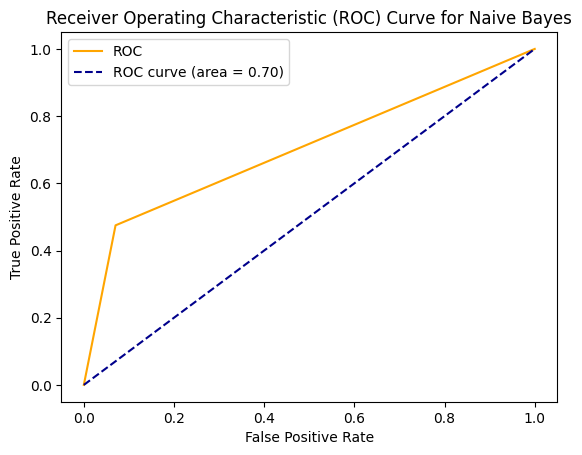

In [223]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend()
plt.show()

### Calculating roc_auc_score for random forest model

In [226]:
# with open('randomForest_HPTuned.sav', 'rb') as f:
#     loaded_model = pickle.load(f)

In [233]:
y_pred = rand_clf.predict(X_test_scaled_df)
print('accuracy score :',accuracy_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

accuracy score : 0.9043296089385475


array([[3668,  553],
       [ 269, 4102]], dtype=int64)

In [229]:
rand_clf.score(X_test_scaled_df,y_test)

0.9043296089385475

In [234]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9043296089385475

In [235]:
Precision = true_positive/(true_positive+false_positive)

Recall = true_positive/(true_positive+false_negative)

F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8992400098063252

In [236]:
auc = roc_auc_score(y_test, y_pred)
auc

0.9037232050682301

In [237]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

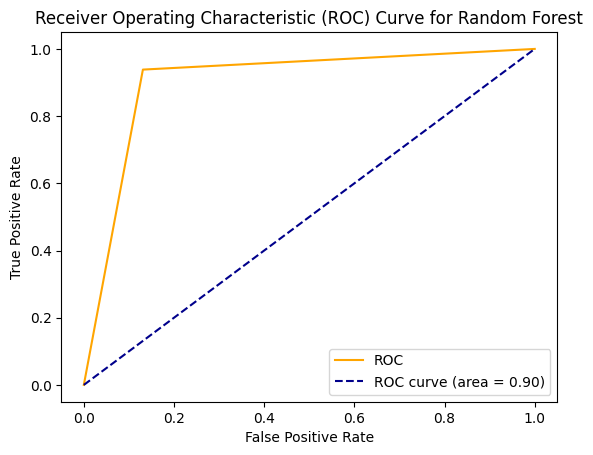

In [238]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend()
plt.show()

In [121]:
df2 = df.sample(10000)

In [122]:
import pickle
with open('randomForest_HPTuned.sav','rb') as f:
    model_rf = pickle.load(f)

In [123]:
with open('labelEncoder.sav','rb') as f:
    le = pickle.load(f)

In [124]:
df2['salary'] = le.fit_transform(df2['salary'])

In [125]:
cat2 = df2.select_dtypes(include=['O'])
for col in cat2.columns:
    df2[col] = le.fit_transform(df2[col])

In [126]:
X = df2.drop(columns=['salary'])
y = df2['salary']

In [127]:
y_predicted = model_rf.predict(X)

In [128]:
type(y_predicted)

numpy.ndarray

In [129]:
y_predct = y_predicted.reshape(-1,1)

In [130]:
model_rf.score(X,y)

0.2529

In [131]:
pred_df = pd.DataFrame()
pred_df['y'] = y
pred_df['predictions'] = y_predicted

In [132]:
pred_df.y.value_counts()

0    7532
1    2468
Name: y, dtype: int64

In [133]:
pred_df.predictions.value_counts()

1    9931
0      69
Name: predictions, dtype: int64